Goal : Develop a model for predicting used car prices.

Data Descrption : The dataset I'll use to predict car prices is tabular data with prices of various cars in connection to other elements; data has 301 rows and 9 columns, and the variable we want to predict is the car's selling price.

Data importing & information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv("/content/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
c=data.corr()

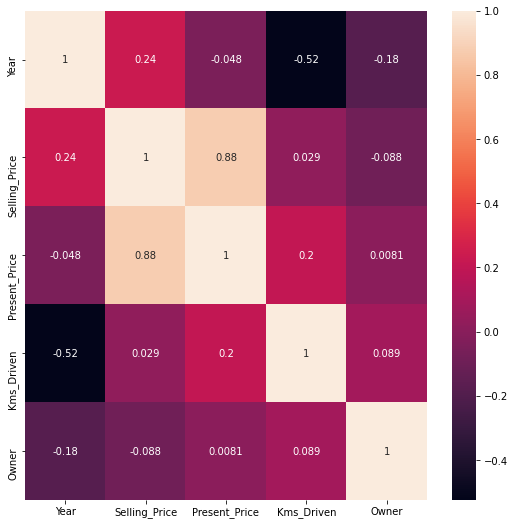

In [9]:
plt.figure(figsize=[9,9])
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
data["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
data["Transmission"].value_counts()


Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding by using replacement technique

In [ ]:
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [ ]:
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

In [ ]:
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
print(data["Fuel_Type"].value_counts())
print(data["Seller_Type"].value_counts())
print(data["Transmission"].value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


Splitting of Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(["Car_Name","Selling_Price"],axis=1),data["Selling_Price"],test_size=0.20,random_state=2)

In [ ]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
235,2017,9.40,15141,0,0,0,0
106,2014,3.45,16500,0,1,0,1
10,2017,3.60,2135,0,0,0,0
152,2012,0.99,13000,0,1,0,0
77,2004,12.35,135154,0,0,1,0


Model Building 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction_on_x_train=LR.predict(x_train)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(prediction_on_x_train,y_train)

0.8685439505823428

In [ ]:
x_test_prediction=LR.predict(x_test)

In [ ]:
metrics.r2_score(x_test_prediction,y_test)

0.8193296211105912

In [ ]:
 from sklearn.linear_model import Lasso

In [ ]:
L=Lasso()

In [ ]:
L.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predict_l=L.predict(x_train)

In [ ]:
metrics.r2_score(y_train,predict_l)

0.843587395258283

In [ ]:
predict_2=L.predict(x_test)

In [ ]:
metrics.r2_score(predict_2,y_test)

0.7717678246278714